*This notebook was created by Sergey Tomin (sergey.tomin@desy.de). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). July 2019.*

## Tutorial N9. Simple accelerator based THz source.

In this tutorial we will focus on another feature of the SR module (see [PFS tutorial N1. Synchrotron radiation module](pfs_1_synchrotron_radiation.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_1_synchrotron_radiation.ipynb)), namely the calculation of coherent radiation.
Details and limitation of the SR module in that mode can be found in [G. Geloni, T. Tanikawa and S. Tomin, Dynamical effects on superradiant THz emission from an undulator. J. Synchrotron Rad. (2019). 26, 737-749](http://scripts.iucr.org/cgi-bin/paper?S1600577519002509)

As a first step we consider a simple accelerator with the electron beam formation system (bunch compressor). Undulator parameters are chosen to generate radiation in THz range. 

### Contents
1. [Accelerator](#accelerator)
    * [Lattice](#lattice)
    * [Simple compression scenario](#compression)
    * [Tracking up to undulator](#track)
2. [Coherent radiation from the beam](#coherent) 

<a id='accelerator'></a>
## Accelerator 

Accelerator includes an accelerator module and linearizer (third harmonic cavity) and a bunch compressor. IN other words we reproduce simplified version of the XFEL injector without the injector dogleg. 
### Lattice 

In [1]:
# To activate interactive matplolib in notebook
# %matplotlib notebook

In [32]:
from ocelot import * 
from ocelot.gui import *
import time

In [33]:
#Initial Twiss parameters
tws0 = Twiss()
tws0.beta_x = 29.171
tws0.beta_y = 29.171
tws0.alpha_x = 10.955
tws0.alpha_y = 10.955

tws0.E = 0.005

# Drifts
D0 = Drift(l=3.52)
D1 = Drift(l=0.3459)
D2 = Drift(l=0.2043)
D3 = Drift(l=0.85)
D4 = Drift(l=0.202)
D5 = Drift(l=0.262)
D6 = Drift(l=2.9)
D8 = Drift(l=1.8)
D9 = Drift(l=0.9)
D11 = Drift(l=1.31)
D12 = Drift(l=0.81)
D13 = Drift(l=0.50)
D14 = Drift(l=1.0)
D15 = Drift(l=1.5)
D18 = Drift(l=0.97)
D19 = Drift(l=2.3)
D20 = Drift(l=2.45)


# Quadrupoles
q1 = Quadrupole(l=0.3, k1=-1.537886, eid='Q1')
q2 = Quadrupole(l=0.3, k1=1.435078, eid='Q2')
q3 = Quadrupole(l=0.2, k1=1.637, eid='Q3')
q4 = Quadrupole(l=0.2, k1=-2.60970, eid='Q4')
q5 = Quadrupole(l=0.2, k1=3.4320, eid='Q5')
q6 = Quadrupole(l=0.2, k1=-1.9635, eid='Q6')
q7 = Quadrupole(l=0.2, k1=-0.7968, eid='Q7')
q8 = Quadrupole(l=0.2, k1=2.7285, eid='Q8')
q9 = Quadrupole(l=0.2, k1=-3.4773, eid='Q9')
q10 = Quadrupole(l=0.2, k1=0.780, eid='Q10')
q11 = Quadrupole(l=0.2, k1=-1.631, eid='Q11')
q12 = Quadrupole(l=0.2, k1=1.762, eid='Q12')
q13 = Quadrupole(l=0.2, k1=-1.8, eid='Q13')
q14 = Quadrupole(l=0.2, k1=1.8, eid='Q14')
q15 = Quadrupole(l=0.2, k1=-1.8, eid='Q15')


# SBends
b1 = SBend(l=0.501471120927, angle=0.1327297047, e2=0.132729705, tilt=1.570796327, eid='B1')
b2 = SBend(l=0.501471120927, angle=-0.1327297047, e1=-0.132729705, tilt=1.570796327, eid='B2')
b3 = SBend(l=0.501471120927, angle=-0.1327297047, e2=-0.132729705, tilt=1.570796327, eid='B3')
b4 = SBend(l=0.501471120927, angle=0.1327297047, e1=0.132729705, tilt=1.570796327, eid='B4')

# Cavitys
c1 = Cavity(l=1.0377, v=0.01815975, freq=1300000000.0, eid='C1')
c3 = Cavity(l=0.346, v=0.0024999884, phi=180.0, freq=3900000000.0, eid='C3')


und = Undulator(lperiod=0.2, nperiods=20, Kx=30)
start_und = Marker()
end = Marker()
# Lattice 
cell = (D0, c1, D1, c1, D1, c1, D1, c1, D1, c1, D1, c1, D1, c1, D1, c1, D2, q1, D3,
        q2, D4, c3, D5, c3, D5, c3, D5, c3, D5, c3, D5, c3, D5, c3, D5, c3, D6, q3, D6,
        q4, D8, q5, D9, q6, D9, q7, D11, q8, D12, q9, D13, b1, D14, b2, D15, b3, D14, b4, D13,
        q10, D9, q11, D18, q12, D19, q13, D19, q14, D19, q15, D20, start_und, und, D14, end)


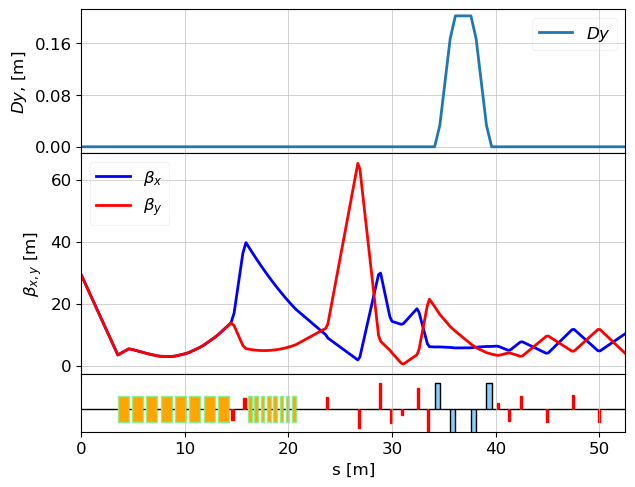

In [34]:
lat = MagneticLattice(cell, stop=start_und)

tws = twiss(lat, tws0)
plot_opt_func(lat, tws, legend=False, fig_name=100, top_plot=["Dy"])
plt.show()

Also we can found the main parameters of the chicane with ```chicane_RTU(yoke_len, dip_dist, r, type)```

In [35]:
from ocelot.utils import *
R56, T566, U5666, Sref = chicane_RTU(yoke_len=0.5, dip_dist=D14.l * np.cos(b1.angle), r=b1.l/b1.angle, type="c")
print("bunch compressor R56 = ", R56, " m")

bunch compressor R56 =  -0.04751528087514777  m


<a id='compression'></a>
## Simple compression scenario

We consider a simple compression scheme with an accelerator module and third harmonic linearizer and a magnetic chicane. To have full picture of the compression techniques, I would recommend:
* [I. Zagorodnov and M. Dohlus, Semianalytical modeling of multistage bunch compression with collective effects](https://journals.aps.org/prab/pdf/10.1103/PhysRevSTAB.14.014403)
* and [M. Dohlus, T. Limberg, and P. Emma, ICFA Beam
Dynamics Newsletter 38, 15 (2005)](https://www.desy.de/~zagor/lecturesFEL/2017/Lecture01/additional/icfa_bd_nl_38.pdf)

To compress a bunch longitudinally, the time of flight through some section must be shorter for the tail of the bunch than it is for the head. The usual technique starts out by introducing a correlation between the longitudinal position of the particles in the bunch and their energy using a radio frequency (RF) accelerating system.
At the end of a linac which induces an energy chirp $\delta' = \frac{1}{E_0}\frac{dE}{ds}$, the mapping of
longitudinal position and relative energy deviation of an electron is 

\begin{equation}
\begin{split}
s_1 &= s_0 \\
\delta_1 &= \delta' s_0 + \delta_{i}
\end{split}
\end{equation}

where $\delta_{i} = \frac{\Delta E_i}{E_0}$ is not correlated energy spread along the bunch length. 

The transformation of the longitudinal coordinate in compressor BC can be approximated by the expression up to first order:

\begin{equation}
\begin{split}
s_2 &= s_1 - R_{56}\delta_1 = (1 - \delta' R_{56}) s_0 + R_{56}\delta_{i}\\
\delta_2 &= \delta_1
\end{split}
\end{equation}
$$\quad$$
Taking an ensemble average over all particles in the bunch and by definition $<s_0 \delta_{i}> = 0$, the second moment of the distribution $\sigma_{s_0} = <s_2^2>^{1/2}$ is:

\begin{equation}
\sigma_{s_2} = \sqrt{ (1 - \delta' R_{56})^2 \sigma_{s_0} + R_{56}^2\sigma_{\delta_{i}}^2 }
\end{equation}

Compression factor is :
\begin{equation}
C = \frac{\sigma_{s_0}}{ \sigma_{s_2}}
\end{equation}


Suppose, uncorrelated energy spread is small and we chose $\delta' = -10$ and $R_{56} = -0.048$ m as we calculated above, in that case the compression factor after the chicane is 
$$
C = \frac{1}{1 - \delta' R_{56}} = 1.9
$$


The non-linearities of both the accelerating RF fields and the longitudinal dispersion
can distort the longitudinal phase space. A higher harmonic RF system can be used to compensate the non-linearities of the fundamental frequency system and the higher order longitudinal dispersion in the magnetic chicanes. 
To linearize longitudinal phase space, a working point for RF phases and amplitudes must be found for the fundamental frequency and the $n$-th harmonic system (n = 3 for the European XFEL).

The relation between the normalized RF amplitudes

\begin{equation} 
\begin{bmatrix}
     1   &       0 & 1 & 0 \\
     0   &       -k & 0 & -n k  \\
     -k^2   &       0 & -(n k )^2 & 0) \\
     0   &       k^3 & 0 &(n k )^3
\end{bmatrix} 
\begin{bmatrix}
    V_1 \cos(\phi_1)\\
    V_1 \sin(\phi_1)\\
    V_{13} \cos(\phi_{13}) \\
    V_{13} \sin(\phi_{13}) \\
\end{bmatrix} = \frac{1}{e}
\begin{bmatrix}
    E_1 - E_0\\
    E_1\delta_2' - E_0 \delta_0'\\
     E_1\delta_2'' - E_0 \delta_0''\\
     E_1\delta_2''' - E_0 \delta_0'''\\
\end{bmatrix} 
\end{equation}
$$\quad$$
In our case we assume initial beam energy $E_0 = 5$ MeV and  $\delta_0' = \delta_0'' = \delta_0''' = 0$.
$$\quad$$
And final energy we chose $E_1 = 130$ MeV and $\delta_2' = -10$ with $\delta_2'' = \delta_2''' = 0$
So, our vector on the right side will be 

\begin{equation} 
\begin{bmatrix}
    E_1 - E_0\\
    E_1\delta_2' - E_0 \delta_0'\\
     E_1\delta_2'' - E_0 \delta_0''\\
     E_1\delta_2''' - E_0 \delta_0'''\\
\end{bmatrix} = 
\begin{bmatrix}
    125\\
    -1300 \\
     0\\
     0\\
\end{bmatrix}
\end{equation} 

<div class="alert alert-block alert-info">
<b>Note:</b> We calculated $R_{56}$ only for the chicane and did not take into account undulator. 
</div>
In our case undulator has high K parameter
$$
R_{56} = -\frac{L_u}{\gamma}(1 + K^2/2) \approx -0.028 \quad m
$$

So, total compression after undulator will be 
$$
C = \frac{1}{1 - \delta R_{56}} = 4.1
$$

In [36]:
import scipy.optimize

# M*a = b
k = 2*np.pi/3e8*1.3e9
n = 3 
M = np.array([[1,     0,      1,          0],
             [0,      -k,     0,       -(n*k)],
             [-k**2,  0,   -(n*k)**2,     0],
             [0,      k**3,   0,      (n*k)**3]])


b = np.array([125, -1300, 0, 0])
def F(x):
    V1 = x[0]
    phi1 = x[1]
    V13 = x[2]
    phi3 = x[3]
    V = np.array([V1*np.cos(phi1*np.pi/180),
             V1*np.sin(phi1*np.pi/180),
             V13*np.cos(phi3*np.pi/180),
             V13*np.sin(phi3*np.pi/180)]).T
    return np.dot(M, V) - b

x = scipy.optimize.broyden1(F, [150, 10, 20, 190])
V1, phi1, V13, phi13 = x
print("V1 = ", V1, " MeV")
print("phi1 = ", phi1)
print("V13 = ", V13, " MeV")
print("phi13 = ", phi13)

V1 =  150.53461559132757  MeV
phi1 =  20.905449652112857
V13 =  15.75114263147219  MeV
phi13 =  187.25608275721325


Now we update cavities parameters in the lattice

In [37]:
# type new parameters, 
# NOTE in OCELOT cavity voltage in [GeV] so to traslate calculated voltage we need factor 1/1000 
# and we have 8 cavities for main RF module and linearizer 
c1.v = V1/8/1000
c1.phi = phi1
c3.v = V13/8/1000
c3.phi = phi13

# and update lattice 
lat.update_transfer_maps()

### Generate electron beam 

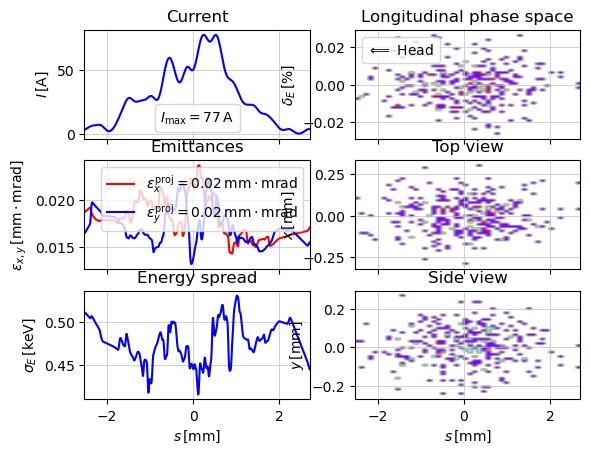

In [38]:
np.random.seed(30)
parray = generate_parray(sigma_x=0.0001, sigma_px=2e-05, sigma_y=None, sigma_py=None, 
                         sigma_tau=0.001, sigma_p=0.0001, chirp=0.0, charge=0.5e-09, 
                         nparticles=300, energy=0.005, tau_trunc=None, shape="gauss")

show_e_beam(parray,nparts_in_slice=50,smooth_param=0.1, nbins_x=50, nbins_y=50, nfig=10)
plt.show()

### Tracking up to undulator

z = 52.547084483708005 / 52.54708448370802. Applied: 

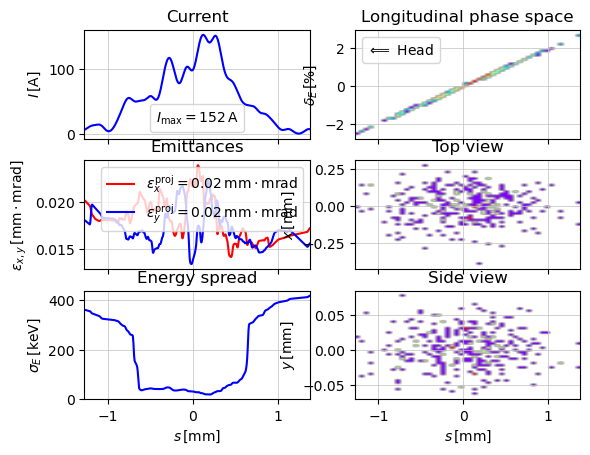

In [39]:
navi = Navigator(lat)
tws_track, parray = track(lat, parray, navi)
show_e_beam(parray, nparts_in_slice=50,smooth_param=0.1, nbins_x=50, nbins_y=50, nfig=201)
plt.show()

In [40]:
parray.E

np.float64(0.1300000026781277)

<a id='coherent'></a>
## Coherent radiation from the beam

In [41]:
from ocelot.rad import *
lat = MagneticLattice(cell, start=start_und, stop=end)

screen = Screen()
screen.z = 1000.0
screen.size_x = 15
screen.size_y = 15
screen.nx = 1
screen.ny = 1
screen.start_energy = 0.001  # eV
screen.end_energy = 3e-3  # eV
screen.num_energy = 1001

# to estimate radiation properties we need to create beam class 

beam = Beam()
beam.E = 0.13

# NOTE: this function just estimate spontanious emmision
print_rad_props(beam, K=und.Kx, lu=und.lperiod, L=und.l, distance=screen.z)


********* ph beam ***********
Ebeam        :  0.13  GeV
K            :  30
B            :  1.6065  T
lambda       :  6.96835E-04  m 
Eph          :  1.77925E-03  eV
1/gamma      :  3930.7605  um
sigma_r      :  5941.5531  um
sigma_r'     :  9332.9698  urad
Sigma_x      :  5941.5531  um
Sigma_y      :  5941.5531  um
Sigma_x'     :  9332.9698 urad
Sigma_y'     :  9332.9698 urad
H. spot size :  9332.9717 / 9.333  mm/mrad
V. spot size :  9332.9717 / 9.333  mm/mrad
I            :  0.0  A
Nperiods     :  20.0
distance     :  1000.0  m
flux tot     :  0.00E+00  ph/sec/0.1%BW
flux density :  0.00E+00  ph/sec/mrad^2/0.1%BW;    0.00E+00  ph/sec/mm^2/0.1%BW
brilliance   :  0.00E+00  ph/sec/mrad^2/mm^2/0.1%BW


n: 299 / 299
time exec:  99.39521408081055  s


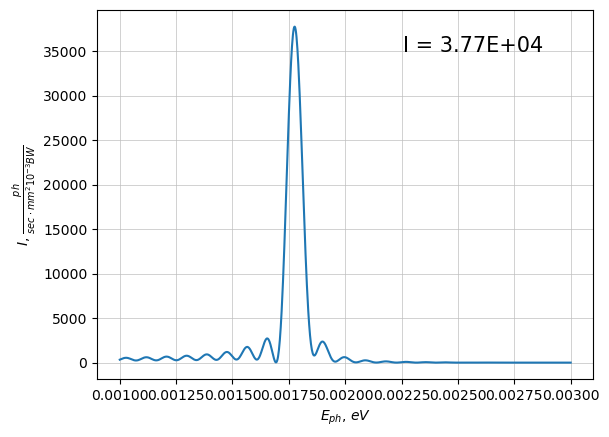

In [42]:
start = time.time()
screen_i = coherent_radiation(lat, screen, parray, accuracy=1)
print()
print("time exec: ", time.time() - start, " s")
show_flux(screen_i, unit="mm", title="")

### Beam after undulator. 
as you can notice, the beam was compressed in the undulator in approximatly in two times as was calculated in the [Simple compression scenario](#compression)

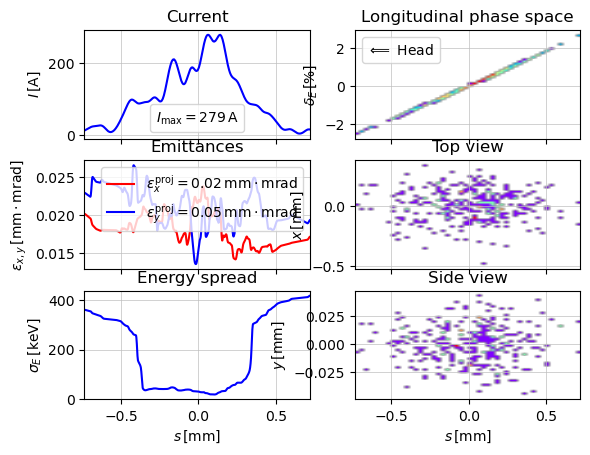

In [43]:
show_e_beam(parray, nparts_in_slice=50,smooth_param=0.1, nbins_x=50, nbins_y=50,  nfig=203)
plt.show()


### Electron trajectories
In some cases, it is worth checking the trajectory of the particle used to calculate the radiation. 
For this purpose, a special object ```BeamTraject``` is attached to the object ```screen``` after radiation calculation:
> screen.beam_traj = BeamTraject()

To retrieve trajectory you need to specify number of electron what you are interested, for example: 
> x = screen.beam_traj.x(n=0)

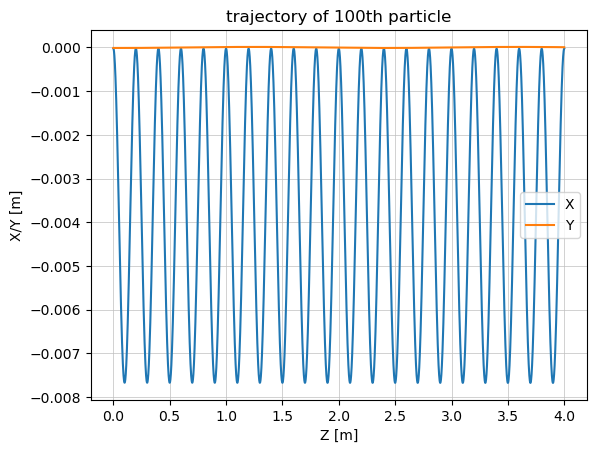

In [44]:
n = 100
x = screen.beam_traj.x(n)
y = screen.beam_traj.y(n)
z = screen.beam_traj.z(n)
plt.title("trajectory of " + str(n)+"th particle")
plt.plot(z, x, label="X")
plt.plot(z, y, label="Y")
plt.xlabel("Z [m]")
plt.ylabel("X/Y [m]")
plt.legend()
plt.show()